# Exercício sobre datasets e análise dos resultados de treinamento

**Observação**: Verifiquem se o uso de GPU está habilitado.

### Nome: Hyago Vieira Lemes Barbosa Silva
### Matrícula: 922

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Baixando o conjunto de dados MNIST


O conjunto de dados MNIST de dígitos manuscritos, pode ser baixado com o [TF](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data).

O conjunto contém imagens 28x28 pixels em tons de cinza dos 10 dígitos (0-9).
Ele possui um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000.

In [2]:
(ltrain_images, ltrain_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Divindo em o conjunto inicial de treinamento em um conjunto de treinamento menor e um conjunto de validação

### Separamos as primeiras 10.000 imagens para o conjunto de validação.

In [3]:
val_images = ltrain_images[:10000]
val_labels = ltrain_labels[:10000]

In [4]:
print(val_images.shape)
print(val_labels.shape)

(10000, 28, 28)
(10000,)


### As 50.000 restantes vão para o novo conjunto de treinamento (menor)

In [5]:
train_images = ltrain_images[10000:]
train_labels = ltrain_labels[10000:]

In [6]:
print(train_images.shape)
print(train_labels.shape)

(50000, 28, 28)
(50000,)


## Pré-processamento dos dados

Vamos aplicar normalização aos dados (i.e., atributos) dos três conjuntos.

Como os valores dos pixels variam entre 0 e 255, basta dividí-los por 255.0 e o intervalo final ficará entre 0.0 e 1.0.

In [7]:
train_images  = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

## Execute a célula de código abaixo e analise as figuras geradas e os resultados de desempenho nos três conjuntos.

### <font color='orange'> Passo de aprendizado muito alto, definido como 0.1

Epoch 1/30
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4284 - accuracy: 0.4895 - val_loss: 1.6850 - val_accuracy: 0.3623
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4582 - accuracy: 0.4799 - val_loss: 1.4352 - val_accuracy: 0.4936
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5208 - accuracy: 0.4495 - val_loss: 1.5834 - val_accuracy: 0.4082
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4134 - accuracy: 0.4840 - val_loss: 1.4675 - val_accuracy: 0.5090
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4583 - accuracy: 0.4727 - val_loss: 1.5951 - val_accuracy: 0.4683
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4639 - accuracy: 0.4666 - val_loss: 1.7265 - val_accuracy: 0.4859
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4067 - accuracy: 0.4784 - val_loss: 1.7292 - val_accuracy

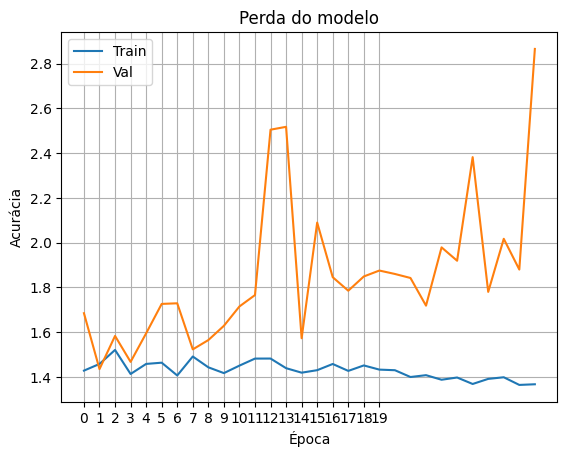

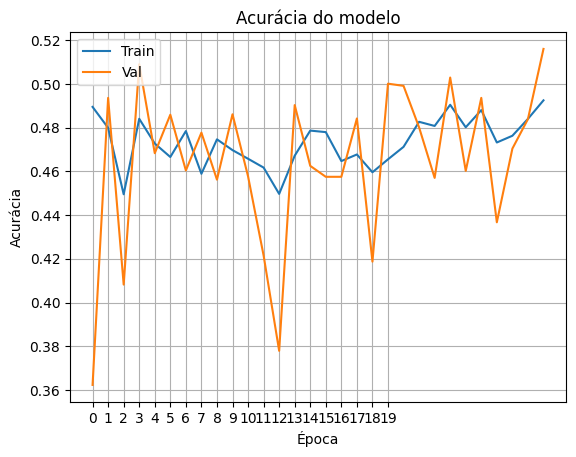

1563/1563 [==============================] - 4s 2ms/step - loss: 2.0959 - accuracy: 0.5100
Treinamento: [2.0958762168884277, 0.5100200176239014]
313/313 [==============================] - 1s 2ms/step - loss: 2.8659 - accuracy: 0.5160
Validação: [2.8659043312072754, 0.515999972820282]
313/313 [==============================] - 1s 3ms/step - loss: 3.2203 - accuracy: 0.5129
Teste: [3.220318078994751, 0.5128999948501587]


In [8]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Instanciando otimizador Adam.
# Passo de aprendizado muito alto
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo.
history = model.fit(
    train_images,
    train_labels,
    epochs=30,
    validation_data=(val_images, val_labels)
)

# Plotando os resultados de perda.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Perda do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.xticks(range(20))
plt.grid()
plt.show()

# Plotando os resultados de acurácia.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.xticks(range(20))
plt.grid()
plt.show()

# Avaliando o desempenho no conjunto de treinamento.
print('Treinamento:', model.evaluate(train_images, train_labels))
# Avaliando o desempenho no conjunto de validação.
print('Validação:', model.evaluate(val_images, val_labels))
# Avaliando o desempenho no conjunto de teste.
print('Teste:', model.evaluate(test_images, test_labels))

### O que você conclui sobre o treinamento deste modelo? Podemos dizer que o modelo treinado tem um bom desempenho? Caso não, o que pode ser feito para melhorar este desempenho? *Justifique suas respostas*

**Reposta**

Não possuirá um bom desempenho pois o passo de aprendizado é muito alto, o que fará com que o valor tanto de erro quanto a acurácia saltem de baixo para alto, repetitivamente, até um ponto que talvez não melhore e fique por um bom tempo, é visto que foi definido um parâmetro acima no otimizador ADAM, especificamente no learning_rate=0.1, por padrão o valor é 0,001, este valor está muito alto, o que fará com que aconteça este fator que comentei acima, assim o gráfico é visto como um zigue-zague de cima para baixo, não convergindo. Para tornar melhor do que está, para começo de conversa alterar esse valor de learning_rate para um valor menor, mas não tão menor, um exemplo seria o próprio valor padrão deste que é 0,001. Além disto poderiam ser feitas outras modificações mas esta seria de bom tamanho para resolver o problema que foi visto acima. Com este passo podemos ver que o conjunto tem um caso que é o subajuste sem capacidade para gerneralizar, e resolver o problema, devido ao passo de aprendizado.

## Execute a célula de código abaixo e analise as figuras geradas e os resultados de desempenho nos três conjuntos.

Epoch 1/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1876 - accuracy: 0.6890 - val_loss: 0.6136 - val_accuracy: 0.8590
Epoch 2/40
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5065 - accuracy: 0.8746 - val_loss: 0.4145 - val_accuracy: 0.8940
Epoch 3/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3854 - accuracy: 0.8980 - val_loss: 0.3451 - val_accuracy: 0.9095
Epoch 4/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.9087 - val_loss: 0.3103 - val_accuracy: 0.9172
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3035 - accuracy: 0.9156 - val_loss: 0.2896 - val_accuracy: 0.9213
Epoch 6/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.9218 - val_loss: 0.2738 - val_accuracy: 0.9261
Epoch 7/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2675 - accuracy: 0.9256 - val_loss: 0.2621 - val_accuracy:

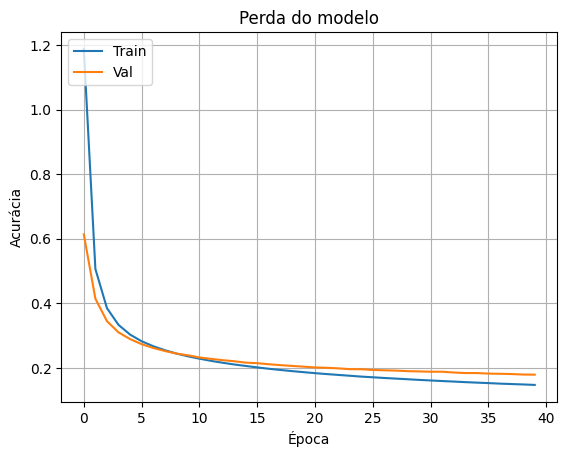

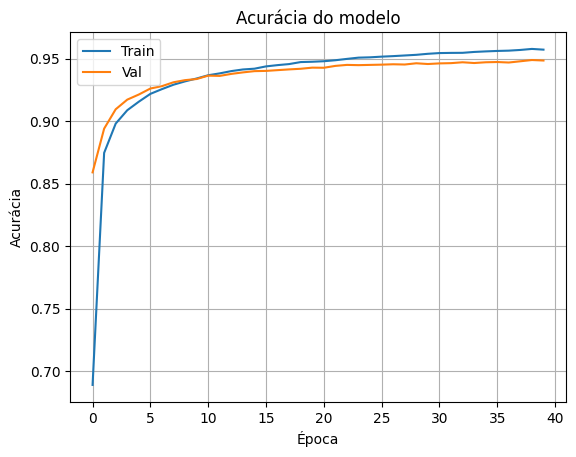

1563/1563 [==============================] - 4s 3ms/step - loss: 0.1447 - accuracy: 0.9588
Treinamento: [0.14472365379333496, 0.9587799906730652]
313/313 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9485
Validação: [0.17936699092388153, 0.9484999775886536]
313/313 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9493
Teste: [0.1707647442817688, 0.9492999911308289]


In [9]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo.
epochs = 40
history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(val_images, val_labels)
)

# Plotando os resultados de perda.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Perda do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plotando os resultados de acurácia.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Avaliando o desempenho no conjunto de treinamento.
print('Treinamento:', model.evaluate(train_images, train_labels))
# Avaliando o desempenho no conjunto de validação.
print('Validação:', model.evaluate(val_images, val_labels))
# Avaliando o desempenho no conjunto de teste.
print('Teste:', model.evaluate(test_images, test_labels))

### O que você conclui sobre o treinamento deste outro modelo? Podemos dizer que o modelo treinado tem um bom desempenho? Caso não, o que pode ser feito para melhorar este desempenho? *Justifique suas respostas*

**Reposta**

Aqui já é o contrário do que houve acima, o passo de aprendizado é muito pequeno, chegará um ponto que o valor de validação irá cair de desempenho, tanto para o loss, aumentando quanto a acurácia, diminuindo, bem pouco mais irá cair, devido ao passo ser pequeno e a quantidade de épocas. Mas pelo que está analisado acima, obteve um valor muito bom. portanto o modelo ficou muito bom, acredito que estaria interessante para generalização. Pois no último ponto da útima época, obtivemos uma variação não tão brusca, foi pequena.

### <font color='orange'> O melhor modelo é este aqui
    loss: 0.1477 - accuracy: 0.9572 - val_loss: 0.1794 - val_accuracy: 0.9485



## Execute a célula de código abaixo e analise o código (mais especificamente a arquitetura da rede neural), as figuras geradas e os resultados de desempenho nos três conjuntos.

Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 0.6797 - accuracy: 0.8075 - val_loss: 0.3037 - val_accuracy: 0.9169
Epoch 2/100
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2628 - accuracy: 0.9252 - val_loss: 0.2260 - val_accuracy: 0.9370
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2048 - accuracy: 0.9417 - val_loss: 0.1884 - val_accuracy: 0.9456
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1698 - accuracy: 0.9519 - val_loss: 0.1642 - val_accuracy: 0.9528
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1455 - accuracy: 0.9580 - val_loss: 0.1470 - val_accuracy: 0.9563
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1267 - accuracy: 0.9634 - val_loss: 0.1358 - val_accuracy: 0.9616
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1125 - accuracy: 0.9670 - val_loss: 0.1315 - val_ac

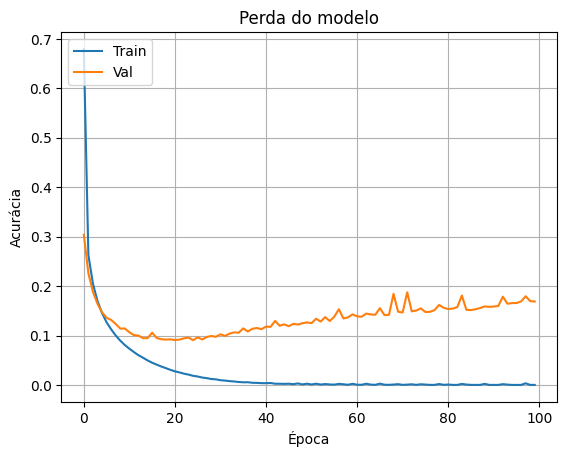

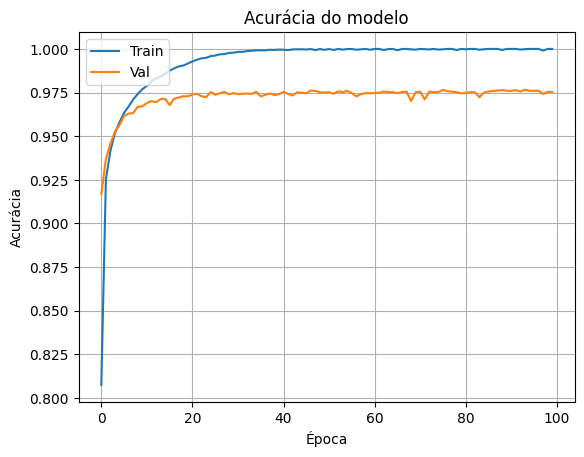

1563/1563 [==============================] - 5s 3ms/step - loss: 4.1093e-05 - accuracy: 1.0000
Treinamento: [4.109295332455076e-05, 1.0]
313/313 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.9753
Validação: [0.16877135634422302, 0.9753000140190125]
313/313 [==============================] - 1s 3ms/step - loss: 0.1534 - accuracy: 0.9757
Teste: [0.15339085459709167, 0.9757000207901001]


In [10]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo.
epochs = 100
history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(val_images, val_labels)
)

# Plotando os resultados de perda.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Perda do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plotando os resultados de acurácia.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Avaliando o desempenho no conjunto de treinamento.
print('Treinamento:', model.evaluate(train_images, train_labels))
# Avaliando o desempenho no conjunto de validação.
print('Validação:', model.evaluate(val_images, val_labels))
# Avaliando o desempenho no conjunto de teste.
print('Teste:', model.evaluate(test_images, test_labels))

### O que você conclui sobre o treinamento deste outro modelo? Podemos dizer que o modelo treinado tem um bom desempenho? Caso não, o que pode ser feito para melhorar este desempenho? *Justifique suas respostas*

**Reposta**


Aqui podemos ver que manteve-se o mesmo passo de aprendizado que o de cima 0,0001 porém a quantidade de épocas agora foram para 100, o que irá diminuir muito os valores no desempenho do modelo, o que estaria bom ja em 100 épocas, o ponto do passo de aprendizado é muito pequeno, chegará um ponto que o valor de validação irá cair de desempenho, tanto para o loss, aumentando quanto a acurácia, diminuindo, bem pouco por época mas devido as 100 épocas isso fará com que no final o modelo esteja com um desempenho inferior caso tivesse parado com menas épocas de treinamento, ou caso fosse menos complexo, devido a quantidade de camadas que possui. Desta vez, veja o modelo possui mais do que apenas 2 camadas ocultas, agora possui 4 camadas ocultas, sendo uma com 128 neurônios, mais uma com 64 outra com 32 todas estas com ativação relu e a última com 10 neurônios com ativação softmax. O problema será o valor da accurácia e o valor do erro que está se divergindo do valor que possui de treinamento para o valor de validação, e por sequência o de teste. Houve aqui o chamado sobreajuste, overfitting. Vício. Veja que a acurácia obteve o valor de 1, então agora o valor irá caindo referente ao valor da validação, mas principalmente o valor de loss será bem diferente do valor de loss da validação ou teste por sequência, portanto, o modelo é bom, mas precisamente poderia diminuir a quantidade de épocas, para 5 até no máximo 20 épocas ou menos épocas e acredito que teria um ótimo resultado já. Aumentar o passo de aprendizado também, e tornar menos complexa com menos neurônios como retirar uma das camadas internas como a primeira de 128, ja ajudaria bastante.


<font size=5px>

    loss: 5.5822e-05 - accuracy: 1.0000 - val_loss: 0.1688 - val_accuracy: 0.9753

    A diferênça do loss treino para o validação, foi de 0,168744178 de
    diferênça, mesmo apareçendo que estaria muito, bom futuramente caso
    apresente um número para ele pode ser que ele erre e muito diferente
    do que se esperava ou que se "parece"

## Execute a célula de código abaixo e analise as figuras geradas e os resultados de desempenho nos três conjuntos.

Epoch 1/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3904 - accuracy: 0.0593 - val_loss: 2.3875 - val_accuracy: 0.0585
Epoch 2/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3850 - accuracy: 0.0605 - val_loss: 2.3821 - val_accuracy: 0.0590
Epoch 3/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3797 - accuracy: 0.0613 - val_loss: 2.3768 - val_accuracy: 0.0601
Epoch 4/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3745 - accuracy: 0.0624 - val_loss: 2.3715 - val_accuracy: 0.0608
Epoch 5/40
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3693 - accuracy: 0.0634 - val_loss: 2.3664 - val_accuracy: 0.0618
Epoch 6/40
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3643 - accuracy: 0.0645 - val_loss: 2.3613 - val_accuracy: 0.0627
Epoch 7/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3593 - accuracy: 0.0656 - val_loss: 2.3562 - val_accuracy:

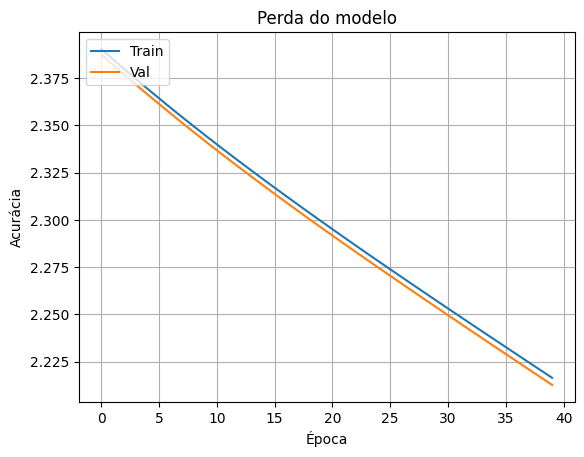

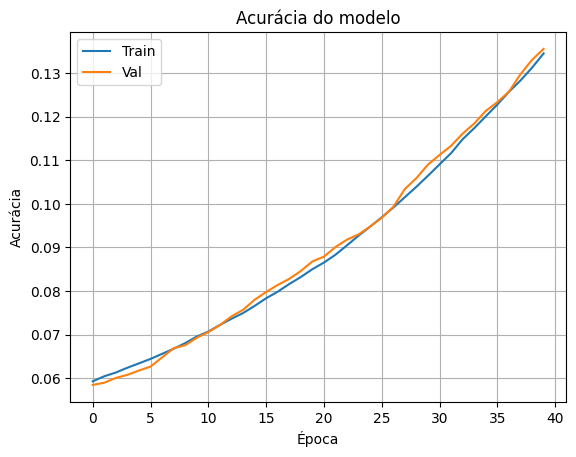

1563/1563 [==============================] - 5s 3ms/step - loss: 2.2144 - accuracy: 0.1359
Treinamento: [2.2143819332122803, 0.13585999608039856]
313/313 [==============================] - 1s 3ms/step - loss: 2.2126 - accuracy: 0.1355
Validação: [2.212639570236206, 0.1354999989271164]
313/313 [==============================] - 1s 3ms/step - loss: 2.2130 - accuracy: 0.1393
Teste: [2.2130024433135986, 0.13930000364780426]


In [11]:
# Definindo o modelo.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Instanciando otimizador Adam.
opt = tf.keras.optimizers.Adam(learning_rate=0.0000001)

# Compilando a rede neural.
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinando o modelo.
epochs = 40
history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(val_images, val_labels)
)

# Plotando os resultados de perda.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Perda do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plotando os resultados de acurácia.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Avaliando o desempenho no conjunto de treinamento.
print('Treinamento:', model.evaluate(train_images, train_labels))
# Avaliando o desempenho no conjunto de validação.
print('Validação:', model.evaluate(val_images, val_labels))
# Avaliando o desempenho no conjunto de teste.
print('Teste:', model.evaluate(test_images, test_labels))

### O que você conclui sobre o treinamento deste outro modelo? Podemos dizer que o modelo treinado tem um bom desempenho? Caso não, o que pode ser feito para melhorar este desempenho? Compare os resultados das figuras acima com os resultados obtidos com o treinamento do segundo modelo. *Justifique suas respostas*

**Reposta**

O problema deste modelo é o passo de aprendizado muito pequeno isso fará com que ele irá demorar muito para convergir, assim ele ficara mesmo com 40 épocas muito tempo para conseguir convergir, o início do erro está altíssimo, e o valor da acurácia está muito baixo, 5 %, no final, necessitaria aumentar o valor do passo de aprendizado, principalmente, e a quantidede de épocas estaria suficiente, acredito colocando uma quantidade de passo padrão do algoritmo de otimização ADAM com 0,001. No final o valor ficou muito alto ainda de erro e o valor de acurácia está muito baixo. Aqui temos novamente o caso de imcapacidade, chamado de subajuste, ou underfitting.

    loss: 2.2164 - accuracy: 0.1345 - val_loss: 2.2126 - val_accuracy: 0.1355